## Final Project Submission

Please fill out:
* Student name: Alexander Claudino Daffara
* Student pace: full time
* Scheduled project review date/time: Jan 27th 2023
* Instructor name: Brendan Hutchinson
* Blog post URL: https://medium.com/@alexanderdaffara


3 ACIONABLE INSIGHTS:
 - runtime
 - genre (month/season)
 - rating (r, pg, pg13) (all movies ~1500 movies vs 2013 onwards movies ~52 movies)
   
   - male/female
   - best directors/genre

IDEAS

 - box office profit compared to:
   - runtime (NEEDS WORK)
   - production budget (DONE)
   - genre (per month/sesason?) (WORK ON MONTH SEASON)
   - by rating (r, pg, ...) (NEED)
   - male vs female lead role (NEED?)
   - movies released per region (looking at movie aka regions) (NEED?)
   - prominent role categories present (sound design, video etc.) (NEED?)
   - best directors and writers (NEED?)
   
 - rating compared to
   - box office

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import warnings
import calendar
warnings.filterwarnings(action='ignore')
%matplotlib inline

# Importing all the Data

## imdb

In [150]:
%%bash
sqlite3 data/im.db
.schema

CREATE TABLE IF NOT EXISTS "movie_basics" (
"movie_id" TEXT,
  "primary_title" TEXT,
  "original_title" TEXT,
  "start_year" INTEGER,
  "runtime_minutes" REAL,
  "genres" TEXT
);
CREATE TABLE IF NOT EXISTS "directors" (
"movie_id" TEXT,
  "person_id" TEXT
);
CREATE TABLE IF NOT EXISTS "known_for" (
"person_id" TEXT,
  "movie_id" TEXT
);
CREATE TABLE IF NOT EXISTS "movie_akas" (
"movie_id" TEXT,
  "ordering" INTEGER,
  "title" TEXT,
  "region" TEXT,
  "language" TEXT,
  "types" TEXT,
  "attributes" TEXT,
  "is_original_title" REAL
);
CREATE TABLE IF NOT EXISTS "movie_ratings" (
"movie_id" TEXT,
  "averagerating" REAL,
  "numvotes" INTEGER
);
CREATE TABLE IF NOT EXISTS "persons" (
"person_id" TEXT,
  "primary_name" TEXT,
  "birth_year" REAL,
  "death_year" REAL,
  "primary_profession" TEXT
);
CREATE TABLE IF NOT EXISTS "principals" (
"movie_id" TEXT,
  "ordering" INTEGER,
  "person_id" TEXT,
  "category" TEXT,
  "job" TEXT,
  "characters" TEXT
);
CREATE TABLE IF NOT EXISTS "writers" (
"m

In [2]:
conn = sqlite3.connect('data/im.db')
cursor = conn.cursor()


In [3]:
movie_basics_df = pd.read_sql("""SELECT * FROM movie_basics """, conn)    # 146144  movie_id  (unique)
directors_df = pd.read_sql("""SELECT * FROM directors """, conn)          # 291174  movie_id  (140417 unique)
known_for_df = pd.read_sql("""SELECT * FROM known_for """, conn)          # 1638260 person_id 
movie_akas_df = pd.read_sql("""SELECT * FROM movie_akas """, conn)        # 331703  movie_id
movie_ratings_df = pd.read_sql("""SELECT * FROM movie_ratings """, conn)  # 73856   movie_id
persons_df = pd.read_sql("""SELECT * FROM persons """, conn)              # 606648  person_id
principals_df = pd.read_sql("""SELECT * FROM principals """, conn)        # 1028186 principals
writers_df = pd.read_sql("""SELECT * FROM writers """, conn)              # 255873  movie_id

In [11]:
# df_with_directors -> movie basics + directors (contains duplicates when a movie has multiple directors)
directors_df = directors_df.drop_duplicates()
df_with_directors = movie_basics_df.merge(directors_df, how="left", on='movie_id')
# merge with persons (losing info about person's occupations, birth and death year, due to too many nan)
df_with_directors = df_with_directors.merge(persons_df[['person_id','primary_name']], 
                                            on='person_id',
                                            how='left')
df_with_directors.rename(columns={'primary_name':'director_name','person_id':'director_id'}, inplace=True)
df_with_directors.drop(columns=['director_id'], inplace=True)
df_with_directors.drop_duplicates(inplace=True)
df_with_directors

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,director_name
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Harnam Singh Rawail
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",Mani Kaul
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,Orson Welles
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",Hrishikesh Mukherjee
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",Valeria Sarmiento
...,...,...,...,...,...,...,...
169257,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,Ana Célia de Oliveira
169258,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,Kanchan Nayak
169259,tt9916730,6 Gunn,6 Gunn,2017,116.0,None,Kiran Gawade
169260,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary,Angela Gurgel


In [12]:
# df_with_writers -> movie basics + writers (contains duplicates when a movie has multiple writers)
writers_df = writers_df.drop_duplicates()
df_with_writers = movie_basics_df.merge(writers_df, how="left", on='movie_id')
# merge with persons (losing info about person's occupations, birth and death year, due to too many nan)
df_with_writers = df_with_writers.merge(persons_df[['person_id','primary_name']], 
                                            on='person_id',
                                            how='left')
df_with_writers.rename(columns={'primary_name':'writer_name','person_id':'writer_id'}, inplace=True)
df_with_writers.drop(columns=['writer_id'], inplace=True)
df_with_writers.drop_duplicates(inplace=True)
df_with_writers

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,writer_name
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Abrar Alvi
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Mahasweta Devi
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Gulzar
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Anjana Rawail
4,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",NaN
...,...,...,...,...,...,...,...
214230,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,Ana Célia de Oliveira
214231,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,Dr. Sudhir Nikam
214232,tt9916730,6 Gunn,6 Gunn,2017,116.0,None,Kiran Gawade
214233,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary,Vinicius Augusto Bozzo


## bom movie gross

In [25]:
# df_with_gross matches gross for all movies with the same name
gross_df = pd.read_csv('data/bom.movie_gross.csv')
gross_df.dropna(subset=['foreign_gross','domestic_gross'], inplace=True)
gross_df['foreign_gross'] = gross_df['foreign_gross'].map(lambda x: float(x.replace(',',"")))
gross_df['total_gross'] = gross_df['foreign_gross'] + gross_df['domestic_gross']
df_with_gross = movie_basics_df.merge(gross_df,
                                      how='inner',
                                      left_on=['primary_title','start_year'],
                                      right_on=['title','year'])
df_with_gross = df_with_gross.loc[df_with_gross['year'] >= 2013] 
df_with_gross

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,title,studio,domestic_gross,foreign_gross,year,total_gross
1,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",The Secret Life of Walter Mitty,Fox,58200000.0,129900000.0,2013,188100000.0
2,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",A Walk Among the Tombstones,Uni.,26300000.0,26900000.0,2014,53200000.0
3,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",Jurassic World,Uni.,652300000.0,1019.4,2015,652301019.4
13,tt0435651,The Giver,The Giver,2014,97.0,"Drama,Romance,Sci-Fi",The Giver,Wein.,45100000.0,21900000.0,2014,67000000.0
18,tt0451279,Wonder Woman,Wonder Woman,2017,141.0,"Action,Adventure,Fantasy",Wonder Woman,WB,412600000.0,409300000.0,2017,821900000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1263,tt7784604,Hereditary,Hereditary,2018,127.0,"Drama,Horror,Mystery",Hereditary,A24,44100000.0,35300000.0,2018,79400000.0
1264,tt7959026,The Mule,The Mule,2018,116.0,"Crime,Drama,Thriller",The Mule,WB,103800000.0,68700000.0,2018,172500000.0
1265,tt8097306,Nobody's Fool,Nobody's Fool,2018,110.0,"Comedy,Drama,Romance",Nobody's Fool,Par.,31700000.0,1800000.0,2018,33500000.0
1266,tt8404272,How Long Will I Love U,Chao shi kong tong ju,2018,101.0,Romance,How Long Will I Love U,WGUSA,747000.0,82100000.0,2018,82847000.0


## TN movie budgets

In [142]:
budgets_df = pd.read_csv('data/tn.movie_budgets.csv')

budgets_df.drop(columns=['id'], inplace=True)
# convert dates and prices from strings to numbers
budgets_df['release_year'] = budgets_df['release_date'].map(lambda x: int(x[-4:]))
budgets_df['production_budget'] = budgets_df['production_budget'].map(lambda x: x.replace('$','').replace(',','')).astype(int)
budgets_df['domestic_gross'] = budgets_df['domestic_gross'].map(lambda x: x.replace('$','').replace(',','')).astype(int)
budgets_df['worldwide_gross'] = budgets_df['worldwide_gross'].map(lambda x: x.replace('$','').replace(',','')).astype(int)
budgets_df['foreign gross'] = budgets_df['worldwide_gross'] - budgets_df['domestic_gross']
budgets_df['profit'] = budgets_df['worldwide_gross'] - budgets_df['production_budget']

# drop rows with no worldwide gross
budgets_df = budgets_df.loc[budgets_df['worldwide_gross'] != 0]

# merge with imdb
df_with_budgets = movie_basics_df.merge(budgets_df,
                                     how='inner',
                                     left_on=['primary_title','start_year'],
                                     suffixes=['_imdb','_budgets'],
                                     right_on=['movie','release_year'])

# modern_budgets_df since 2013
modern_budgets_df = budgets_df.loc[budgets_df['release_year'] >= 2013]
vintage_budgets_df = budgets_df.loc[budgets_df['release_year'] < 2013]
vintage_budgets_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,foreign gross,profit
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2009,2015837654,2351345279
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,804600000,635063875
7,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000,309420425,963420425,2007,654000000,663420425
10,"Jul 20, 2012",The Dark Knight Rises,275000000,448139099,1084439099,2012,636300000,809439099
13,"Mar 9, 2012",John Carter,275000000,73058679,282778100,2012,209719421,7778100
...,...,...,...,...,...,...,...,...
5775,"May 26, 2006",Cavite,7000,70071,71644,2006,1573,64644
5776,"Dec 31, 2004",The Mongol King,7000,900,900,2004,0,-6100
5778,"Apr 2, 1999",Following,6000,48482,240495,1999,192013,234495
5779,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,2005,0,-3662


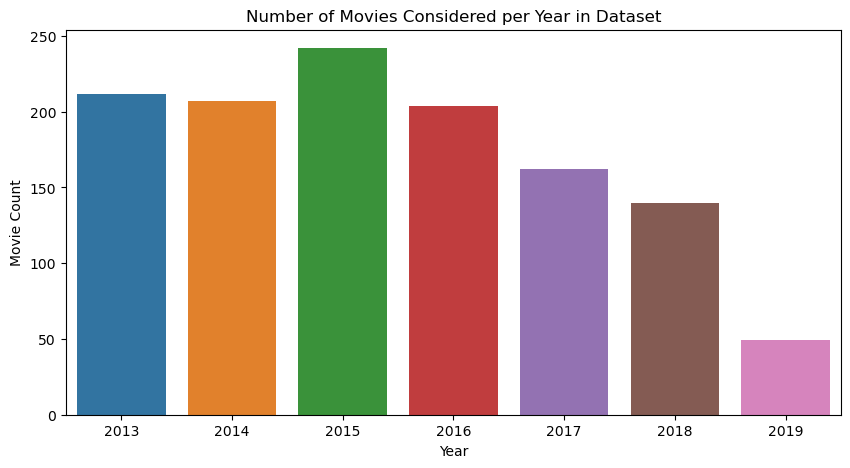

In [54]:
fig, ax = plt.subplots(figsize=(10,5))
data = modern_budgets_df.release_year.value_counts()
sns.barplot(x = data.index,
            y = data,
            ax=ax,
            errwidth=0).set(title='Number of Movies Considered per Year in Dataset', ylabel='Movie Count', xlabel='Year')
plt.show()

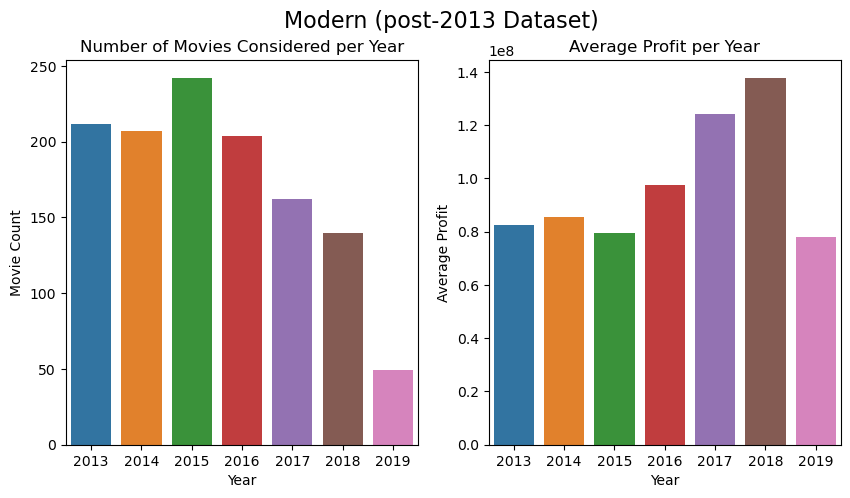

In [55]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))
data = modern_budgets_df.release_year.value_counts()
sns.barplot(x = data.index,
            y = data,
            ax=ax1,
            errwidth=0).set(title='Number of Movies Considered per Year', ylabel='Movie Count', xlabel='Year')
data = modern_budgets_df.groupby('release_year').mean()
sns.barplot(x = data.index,
            y = 'profit',
            data=data,
            ax=ax2,
            errwidth=0).set(title='Average Profit per Year', ylabel='Average Profit', xlabel='Year')
fig.suptitle('Modern (post-2013 Dataset)', fontsize=16)
plt.show()

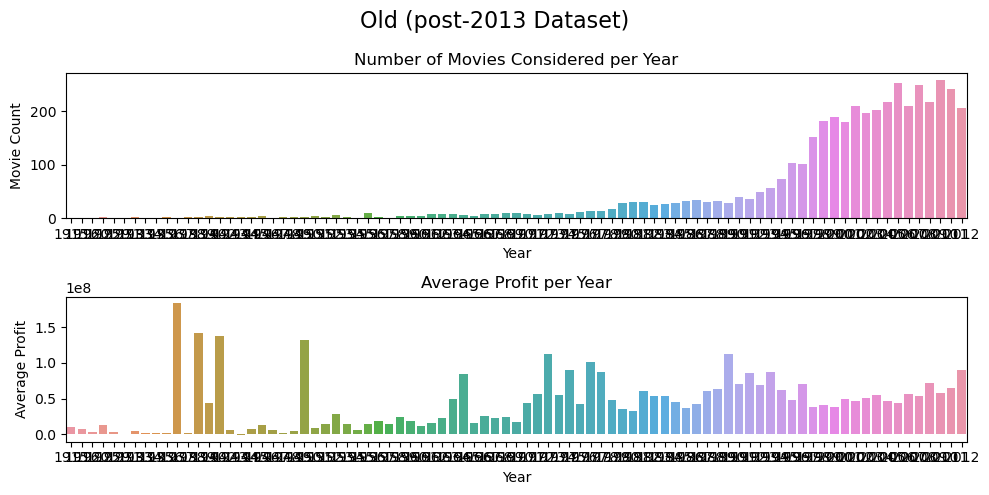

In [64]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(10,5))
data = vintage_budgets_df.release_year.value_counts()
sns.barplot(x = data.index,
            y = data,
            ax=ax1,
            errwidth=0).set(title='Number of Movies Considered per Year', ylabel='Movie Count', xlabel='Year')
data = vintage_budgets_df.groupby('release_year').mean()
sns.barplot(x = data.index,
            y = 'profit',
            data=data,
            ax=ax2,
            errwidth=0).set(title='Average Profit per Year', ylabel='Average Profit', xlabel='Year')
fig.suptitle('Old (post-2013 Dataset)', fontsize=16)
plt.tight_layout()
plt.show()

## rt movie info

In [72]:
rt_info_df = pd.read_csv('data/rt.movie_info.tsv', delimiter='\t')

def to_week_day(date):
    date = date.split()
    date[1] = date[1].replace(',','')
    month_id = list(calendar.month_abbr).index(date[0])
    return calendar.weekday(int(date[2]),month_id,int(date[1]))

def to_season(date):
    date = date.split()
    date[1] = date[1].replace(',','')
    month = date[0]
    day = int(date[1])
    if month in ('Jan', 'Feb', 'Mar'):
        season = 'winter'
    elif month in ('Apr', 'May', 'Jun'):
        season = 'spring'
    elif month in ('Jul', 'Aug', 'Sep'):
        season = 'summer'
    else:
        season = 'autumn'

    if (month == 'Mar') and (day > 19):
        season = 'spring'
    elif (month == 'Jun') and (day > 20):
        season = 'summer'
    elif (month == 'Sep') and (day > 21):
        season = 'autumn'
    elif (month == 'Dec') and (day > 20):
        season = 'winter'
    return season

# rt_cleaned_df disconsiders nan values, rt_cleaned_df_10 is only the 2010
rt_cleaned_df = rt_info_df.dropna()
rt_cleaned_df['box_office'] = rt_cleaned_df.box_office.map(lambda x : int(x.replace(',','')))
rt_cleaned_df['runtime'] = rt_cleaned_df.runtime.map(lambda x: int(x[:-8]))
rt_cleaned_df['theater_year'] = rt_cleaned_df.theater_date.map(lambda x : int(x[-4:]))
rt_cleaned_df['theater_weekday_id'] = \
    rt_cleaned_df.theater_date.map(to_week_day)
rt_cleaned_df['theater_weekday'] = rt_cleaned_df.theater_weekday_id.map({1:'tues',2:'wed',3:'thurs',4:'fri'})
rt_cleaned_df['theater_season'] = rt_cleaned_df.theater_date.map(to_season)
rt_cleaned_df_10 = rt_cleaned_df.loc[rt_cleaned_df['theater_year'] >= 2013]
rt_cleaned_df_10

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,theater_year,theater_weekday_id,theater_weekday,theater_season
18,25,"From ancient Japan's most enduring tale, the e...",PG-13,Action and Adventure|Drama|Science Fiction and...,Carl Erik Rinsch,Chris Morgan|Hossein Amini,"Dec 25, 2013","Apr 1, 2014",$,20518224,127,Universal Pictures,2013,2,wed,winter
76,95,BLEED FOR THIS is the incredible true story of...,R,Drama|Sports and Fitness,Ben Younger,Ben Younger,"Nov 18, 2016","Feb 14, 2017",$,5051927,116,Open Road Films,2016,4,fri,autumn
146,191,Award-winning filmmaker Rakeysh Omprakash Mehr...,NR,Drama,Rakeysh Omprakash Mehra|Rakeysh Omprakesh Mehra,Prasoon Joshi,"Jul 12, 2013","Jan 12, 2015",$,1626289,188,Reliance Entertainment,2013,4,fri,summer
189,250,BYZANTIUM is director Neil Jordan's (Interview...,R,Art House and International|Drama|Horror|Myste...,Neil Jordan,Moira Buffini,"Jun 28, 2013","Oct 29, 2013",$,84293,118,IFC Films,2013,4,fri,summer
190,251,"In this adaptation of the novel ""The Price of ...",R,Drama|Romance,Todd Haynes,Phyllis Nagy,"Nov 20, 2015","Mar 15, 2016",$,8518148,118,The Weinstein Company,2015,4,fri,autumn
214,281,"Seth MacFarlane directs, produces, co-writes a...",R,Comedy|Western,Seth MacFarlane,Seth MacFarlane|Alec Sulkin|Wellesley Wild,"May 30, 2014","Oct 7, 2014",$,37331031,116,Universal Pictures,2014,4,fri,spring
242,313,Set against the backdrop of 1970's Texas Hill ...,R,Drama,David Lowery,David Lowery,"Aug 16, 2013","Dec 17, 2013",$,200000,105,IFC Films,2013,4,fri,summer
246,321,Unlimited funds have allowed Diana (McCarthy) ...,R,Comedy,Seth Gordon,Craig Mazin,"Feb 7, 2013","Jun 4, 2013",$,134455175,111,Universal Pictures,2013,3,thurs,winter
247,322,When her heart is stolen by a seductive strang...,R,Horror,Guillermo del Toro,Guillermo del Toro|Matthew Robbins|Lucinda Coxon,"Oct 16, 2015","Feb 9, 2016",$,25957696,119,Universal Pictures,2015,4,fri,autumn
261,345,When five struggling single moms put aside the...,PG-13,Comedy|Drama,Tyler Perry,Tyler Perry,"Mar 14, 2014","Jul 22, 2014",$,15986272,111,Lionsgate Films,2014,4,fri,winter


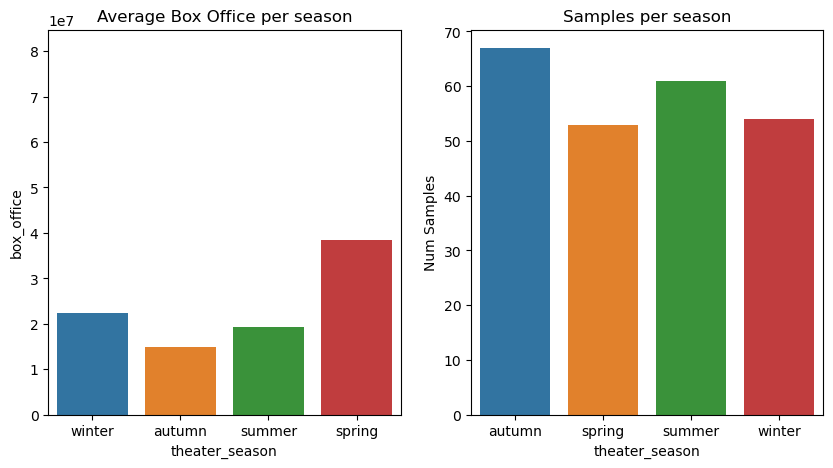

In [73]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(10,5))
sns.barplot(x = 'theater_season', 
            y='box_office', 
            data = rt_cleaned_df_10.sort_values(by='theater_weekday_id'), 
            ax=ax1, 
            errwidth=0).set(title='Average Box Office per season')
data = rt_cleaned_df.groupby('theater_season').count()
sns.barplot(x = data.index, 
            y = 'id',
            data = data,
            ax=ax2, 
            errwidth=0).set(title='Samples per season', ylabel='Num Samples')
plt.show()

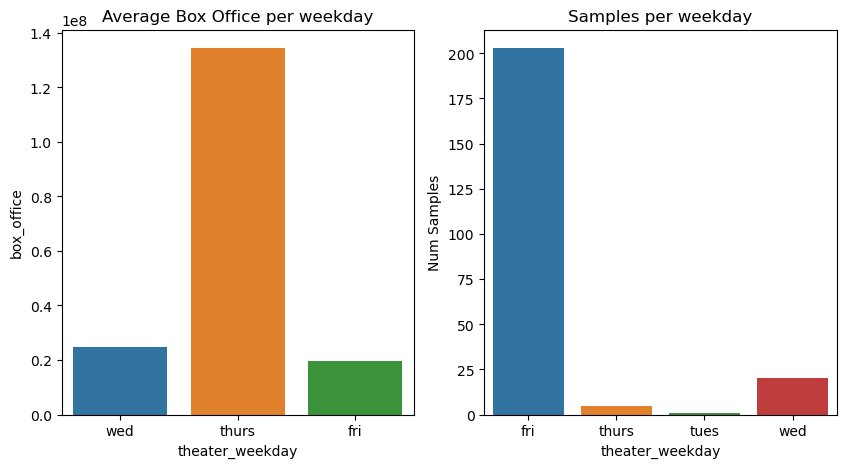

In [75]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(10,5))
sns.barplot(x = 'theater_weekday', 
            y='box_office', 
            data = rt_cleaned_df_10.sort_values(by='theater_weekday_id'), 
            ax=ax1, 
            errwidth=0).set(title='Average Box Office per weekday')
data = rt_cleaned_df.groupby('theater_weekday').count()
sns.barplot(x = data.index, 
            y = 'id',
            data = data,
            ax=ax2, 
            errwidth=0).set(title='Samples per weekday', ylabel='Num Samples')
plt.show()

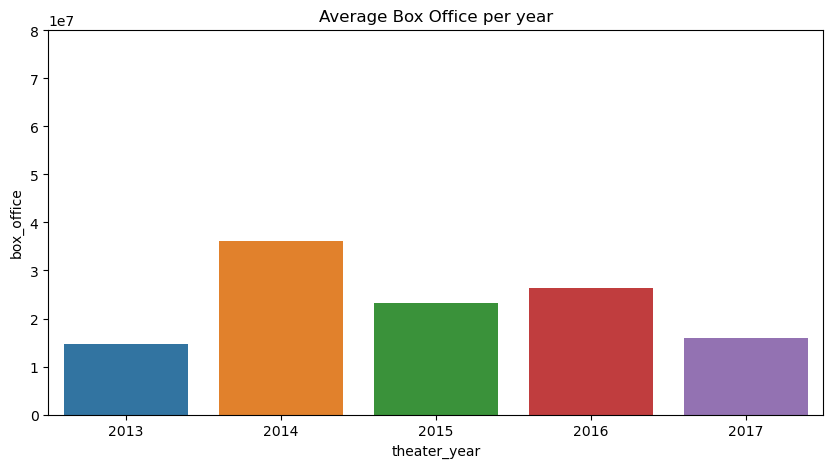

In [76]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x = 'theater_year', 
            y = 'box_office',
            data = rt_cleaned_df_10, 
            errwidth=0,
            ax=ax).set(title='Average Box Office per year')
plt.show()

## rt reviews

In [80]:
rt_reviews_df = pd.read_csv('data/rt.reviews.tsv', delimiter='\t', encoding='latin-1')
rt_reviews_df.rating.to_list()

['3/5',
 nan,
 nan,
 nan,
 nan,
 nan,
 'C',
 '2/5',
 nan,
 nan,
 nan,
 'B-',
 '2/4',
 'B',
 '3/4',
 '3/5',
 '4/5',
 'B',
 '2/4',
 '4/4',
 '6/10',
 '1/4',
 '8',
 '2/5',
 '2.5/4',
 '4/10',
 nan,
 '2.5/4',
 nan,
 '2.0/5',
 '3/10',
 '7/10',
 nan,
 '3/5',
 'C',
 'A-',
 '4/5',
 nan,
 nan,
 nan,
 '5/5',
 nan,
 'F',
 '3.5/4',
 '3/5',
 '4/4',
 nan,
 '2/4',
 '2/4',
 nan,
 '2/4',
 'B-',
 '4/5',
 'D+',
 '1.5/4',
 '2/4',
 '3.5/5',
 '2.5/4',
 '2/4',
 '8/10',
 nan,
 '1/4',
 '3/4',
 '3/4',
 '2/4',
 nan,
 'B',
 'B+',
 '4/4',
 '3.5/4',
 '3/5',
 nan,
 '6/10',
 nan,
 'A-',
 '3.5/5',
 nan,
 nan,
 nan,
 nan,
 nan,
 '1/4',
 '1.5/4',
 nan,
 '9/10',
 nan,
 nan,
 '2/4',
 '2.5/5',
 nan,
 '2/5',
 nan,
 '3.5/5',
 '3/4',
 nan,
 '1/4',
 'C',
 '7.5/10',
 'A-',
 nan,
 '5/5',
 '7/10',
 '4/5',
 '5.5/10',
 'B-',
 nan,
 '3.5/4',
 'C-',
 '4/5',
 '1.5/5',
 '3/5',
 '3.5/5',
 '1/5',
 '3.5/5',
 '4/5',
 '2/5',
 nan,
 '4/5',
 nan,
 nan,
 nan,
 '2/5',
 '6/10',
 '4/5',
 '4/5',
 '3/5',
 '3/5',
 '1.5/5',
 'B',
 '3/5',
 nan,
 '2/5',


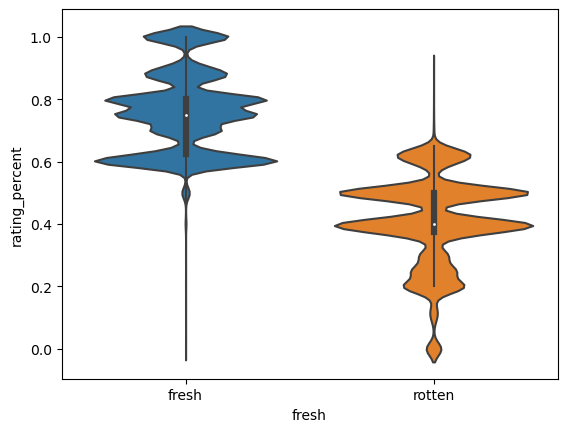

In [369]:
# ratings vs freshness
rt_reviews_df = pd.read_csv('data/rt.reviews.tsv', delimiter='\t', encoding='latin-1')
rt_reviews_df.dropna(subset=['rating'], inplace=True)

def rating_map(x):
    if x[0].isnumeric() and len(x.split()) == 1:
        if '/' in x: return eval(x)
    return np.nan

rt_reviews_df['rating_percent'] = rt_reviews_df.rating.map(rating_map)
rt_reviews_df.dropna(subset=['rating_percent'],inplace=True)
rt_reviews_df.drop(index = rt_reviews_df.loc[rt_reviews_df['rating_percent'] > 1].index, inplace=True)
ax = sns.violinplot(x='fresh',y='rating_percent', data=rt_reviews_df)

# Cost vs Revenue

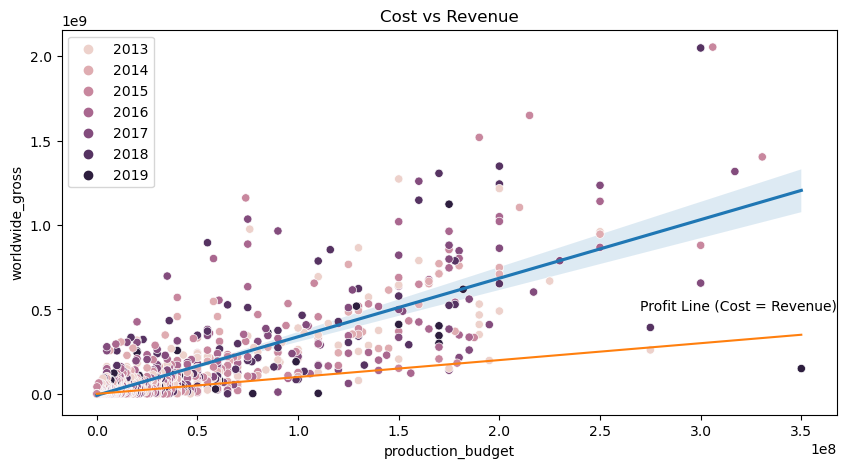

0.7924385564080456

In [104]:
fig, ax = plt.subplots(figsize=(10,5))
sns.regplot(x='production_budget',
            y='worldwide_gross',
            scatter=False,
            data=modern_budgets_df,
            ax=ax)
sns.scatterplot(x='production_budget',
                y='worldwide_gross',
                hue='release_year',
                data=modern_budgets_df,
                ax=ax)
sns.lineplot(x=range(0,350000000, 10000),
             y=range(0, 350000000, 10000),
             ax=ax)
ax.set(title='Cost vs Revenue')
ax.text(270000000,500000000,'Profit Line (Cost = Revenue)')
plt.show()
modern_budgets_df.corr()['production_budget']['worldwide_gross']

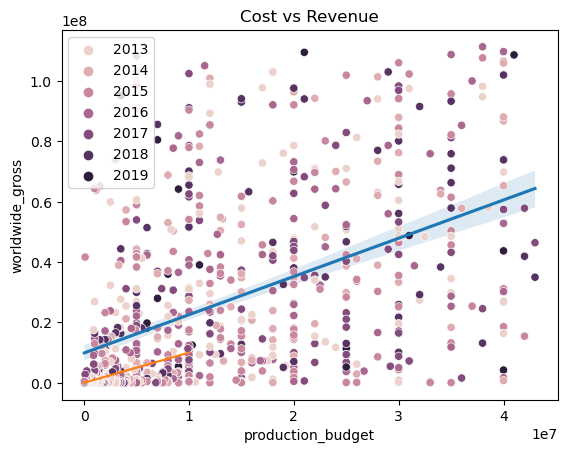

0.4873696884712474

In [97]:
# THIS WILL SET MODERN BUDGETS TO EXCLUDE WORLDWIDE_GROSS OUTLIERS
iqr = modern_budgets_df['worldwide_gross'].quantile(.75) - modern_budgets_df['worldwide_gross'].quantile(.25)
upper_bound = modern_budgets_df.worldwide_gross.mean() + 1.5 * iqr
lower_bound = modern_budgets_df.worldwide_gross.mean() - 1.5 * iqr
modern_budgets_df = modern_budgets_df.loc[(modern_budgets_df.worldwide_gross < upper_bound) & (modern_budgets_df.worldwide_gross > lower_bound)]

# THIS WILL SET MODERN BUDGETS TO EXCLUDE 150/1200 production_budget OUTLIERS
iqr = modern_budgets_df['production_budget'].quantile(.75) - modern_budgets_df['production_budget'].quantile(.25)
upper_bound = modern_budgets_df.production_budget.mean() + 1.5 * iqr
lower_bound = modern_budgets_df.production_budget.mean() - 1.5 * iqr
modern_budgets_df = modern_budgets_df.loc[(modern_budgets_df.production_budget < upper_bound) & (modern_budgets_df.production_budget > lower_bound)]

fig, ax = plt.subplots()
sns.regplot(x='production_budget',
            y='worldwide_gross',
            scatter=False,
            data=modern_budgets_df,
            ax=ax)
sns.scatterplot(x='production_budget',
                y='worldwide_gross',
                hue='release_year',
                data=modern_budgets_df,
                ax=ax)
sns.lineplot(x=range(0,10000000, 10000),
             y=range(0, 10000000, 10000),
             ax=ax)
ax.set(title='Cost vs Revenue')
plt.show()
modern_budgets_df.corr()['production_budget']['worldwide_gross']

# Profit vs runtime

In [110]:
profit_runtime_df.describe()

,production_budget,domestic_gross,worldwide_gross,release_year,foreign gross,profit,start_year,runtime_minutes
count,7.830000e+02,7.830000e+02,7.830000e+02,783.000000,7.830000e+02,7.830000e+02,783.000000,783.000000
mean,3.426957e+07,3.538155e+07,7.755082e+07,2015.360153,4.216928e+07,4.328126e+07,2015.360153,107.598978
std,4.108290e+07,3.714970e+07,8.811864e+07,1.757133,5.924640e+07,6.167531e+07,1.757133,18.629037
min,2.500000e+04,0.000000e+00,2.600000e+01,2013.000000,0.000000e+00,-5.092332e+07,2013.000000,5.000000
25%,8.400000e+06,5.071757e+06,1.081291e+07,2014.000000,2.692198e+06,-7.360600e+05,2014.000000,96.000000
50%,2.000000e+07,2.558450e+07,4.625576e+07,2015.000000,1.781235e+07,2.107854e+07,2015.000000,106.000000
75%,4.000000e+07,5.316124e+07,1.079685e+08,2017.000000,5.495036e+07,7.143249e+07,2017.000000,118.000000
max,2.750000e+08,2.137675e+08,4.110029e+08,2019.000000,3.298528e+08,2.449007e+08,2019.000000,172.000000


In [111]:
# CONSIDER IMPUTING MEAN/MEDIAN for 31k out of 146k 
runtime_df = movie_basics_df.dropna(subset=['runtime_minutes'])
runtime_df = runtime_df.loc[runtime_df['runtime_minutes'] < 200]
profit_runtime_df = modern_budgets_df.merge(runtime_df[['primary_title','start_year','runtime_minutes']],
                                            how='inner',
                                            left_on=['movie','release_year'],
                                            right_on=['primary_title','start_year'])
def get_length(x):
    short_bound = profit_runtime_df['runtime_minutes'].quantile(.33)
    long_bound = profit_runtime_df['runtime_minutes'].quantile(.66)
    if x < short_bound:
        return 'short'
    if x < long_bound:
        return 'medium'
    else:
        return 'long'
    

profit_runtime_df['length'] = profit_runtime_df['runtime_minutes'].map(get_length)
profit_runtime_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,foreign gross,profit,primary_title,start_year,runtime_minutes,length
0,"May 25, 2018",Solo: A Star Wars Story,275000000,213767512,393151347,2018,179383835,118151347,Solo: A Star Wars Story,2018,135.0,long
1,"Jul 2, 2013",The Lone Ranger,275000000,89302115,260002115,2013,170700000,-14997885,The Lone Ranger,2013,150.0,long
2,"Jun 9, 2017",The Mummy,195000000,80101125,409953905,2017,329852780,214953905,The Mummy,2017,110.0,medium
3,"Mar 1, 2013",Jack the Giant Slayer,195000000,65187603,197687603,2013,132500000,2687603,Jack the Giant Slayer,2013,114.0,long
4,"May 10, 2013",The Great Gatsby,190000000,144840419,351040419,2013,206200000,161040419,The Great Gatsby,2013,143.0,long
...,...,...,...,...,...,...,...,...,...,...,...,...
778,"Jul 25, 2014",Happy Christmas,70000,30312,30312,2014,0,-39688,Happy Christmas,2014,82.0,short
779,"Jul 31, 2015",Counting,50000,8374,8374,2015,0,-41626,Counting,2015,111.0,medium
780,"Jan 27, 2017",Emily,27000,3547,3547,2017,0,-23453,Emily,2017,83.0,short
781,"Sep 1, 2015",Exeter,25000,0,489792,2015,489792,464792,Exeter,2015,91.0,short


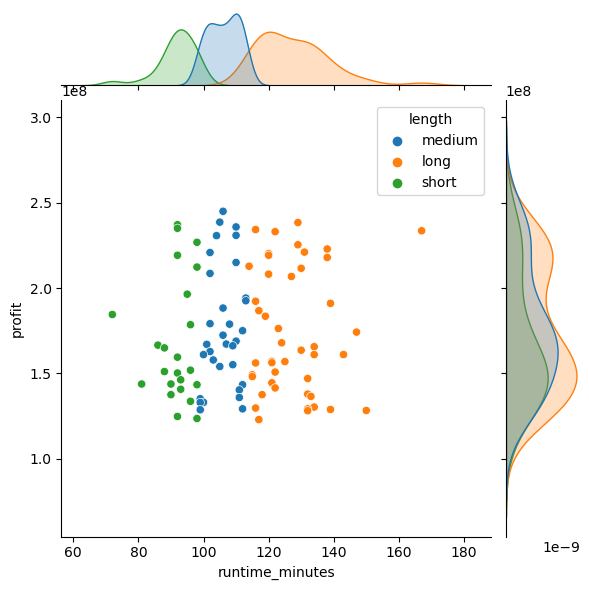

average movie runtimes per category: 
length
long      127.555556
medium    106.187500
short      91.652174
Name: runtime_minutes, dtype: float64

length value counts:
long      45
medium    32
short     23
Name: length, dtype: int64

average short profit: 33,817,284
average medium profit: 42,747,487
average long profit: 52,570,746


In [149]:
# look at runtime vs profit for the top_n highest profit films 
top_n = 100 # max n = 783

most_profit_df = profit_runtime_df.sort_values(by='profit', ascending=False).head(top_n)
sns.jointplot(x='runtime_minutes',
              y='profit',
              hue='length',
              data=most_profit_df,
              kind='scatter')
# sns.lineplot(x=range(0,200, 10),
#              y=[0] * 20,
             
#              ax=ax)
plt.show()
print("average movie runtimes per category: ")
print(most_profit_df.groupby('length').mean()['runtime_minutes'], end='\n\n')
print("length value counts:")
print(most_profit_df['length'].value_counts(), end='\n\n')
print("average short profit: {:,}".format(int(profit_runtime_df.loc[profit_runtime_df['length'] == 'short']['profit'].mean())))
print("average medium profit: {:,}".format(int(profit_runtime_df.loc[profit_runtime_df['length'] == 'medium']['profit'].mean())))
print("average long profit: {:,}".format(int(profit_runtime_df.loc[profit_runtime_df['length'] == 'long']['profit'].mean())))

# Genre vs profit

In [143]:
# THIS WILL SET MODERN BUDGETS TO EXCLUDE 150/1200 PROFIT OUTLIERS
iqr = modern_budgets_df['profit'].quantile(.75) - modern_budgets_df['profit'].quantile(.25)
upper_bound = modern_budgets_df.profit.mean() + 1.5 * iqr
lower_bound = modern_budgets_df.profit.mean() - 1.5 * iqr
modern_budgets_df = modern_budgets_df.loc[(modern_budgets_df.profit < upper_bound) & \
                                          (modern_budgets_df.profit > lower_bound)]

In [144]:
# profit_genre_df has genres for each film split (exploded) into multiple rows
genre_df = movie_basics_df.dropna(subset=['genres'])
genre_df['genres'] = genre_df['genres'].map(lambda x: x.split(','))
genre_df = genre_df.explode('genres')
profit_genre_df = modern_budgets_df.merge(genre_df,
                                          how='inner',
                                          left_on=['movie','release_year'],
                                          right_on=['primary_title', 'start_year'],
                                          suffixes=['_budgets','_genres'])

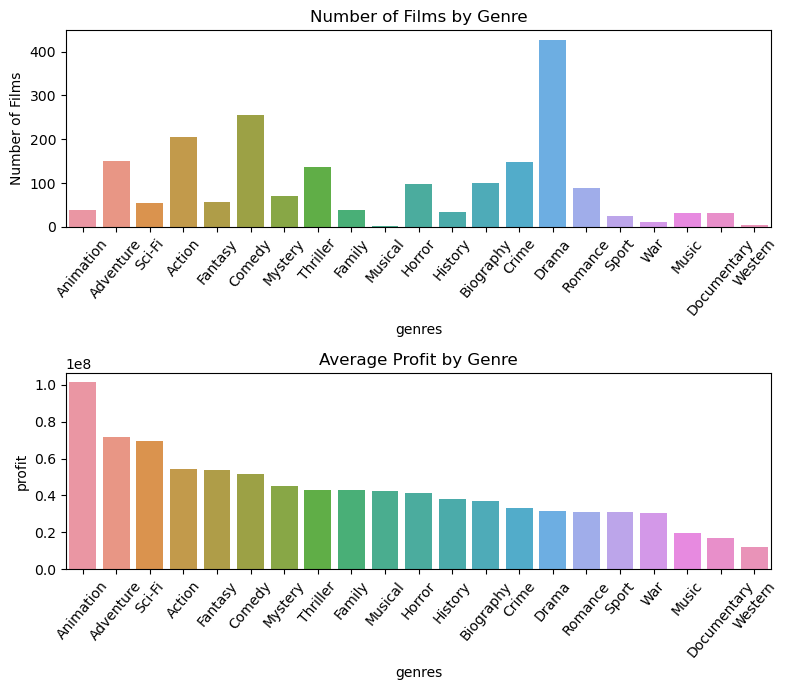

In [145]:
#data for profit per genre
grouped_profit_genre_df = profit_genre_df.groupby('genres').mean().sort_values(by='profit', ascending=False)

# data for counts per genre
grouped_count_profit_genre_df = profit_genre_df.groupby('genres').count()
genre_order_mapping = {k:v for k,v in zip(grouped_profit_genre_df.index,range(len(grouped_profit_genre_df)))}
grouped_count_profit_genre_df['genre_order'] = \
    pd.Series(grouped_count_profit_genre_df.index).map(genre_order_mapping).to_list()
grouped_count_profit_genre_df = grouped_count_profit_genre_df.sort_values(by='genre_order')

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(8,7))
sns.barplot(x=grouped_count_profit_genre_df.index,
            y='profit',
            data=grouped_count_profit_genre_df,
            errwidth=0,
            ax=ax1).set(title='Number of Films by Genre', ylabel='Number of Films')
ax1.set_xticklabels(grouped_count_profit_genre_df.index, rotation=50)

sns.barplot(x=grouped_profit_genre_df.index,
            y='profit',
            data=grouped_profit_genre_df,
            errwidth=0,
            ax=ax2).set(title='Average Profit by Genre')

plt.xticks(rotation=50)
fig.tight_layout()
plt.show()

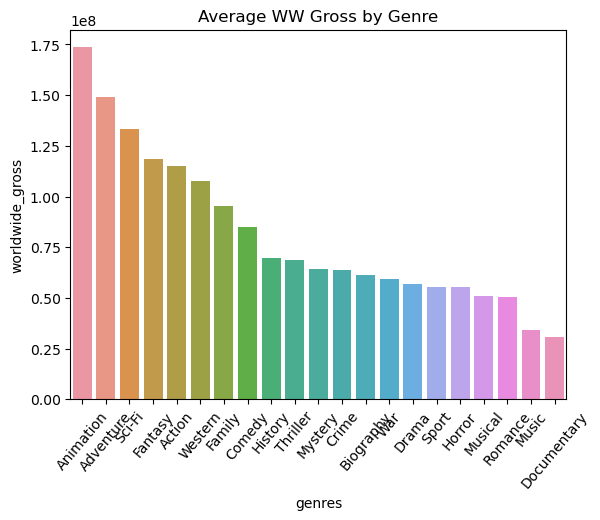

In [146]:
#data for ww gross per genre
grouped_profit_genre_df = profit_genre_df.groupby('genres').mean().sort_values(by='worldwide_gross', ascending=False)

sns.barplot(x=grouped_profit_genre_df.index,
            y='worldwide_gross',
            data=grouped_profit_genre_df,
            errwidth=0).set(title='Average WW Gross by Genre')

plt.xticks(rotation=50)
fig.tight_layout()
plt.show()

In [191]:
# profit_genreTuples_df has genres tuples for each film split (exploded) into multiple rows
genreTuples_df = movie_basics_df.dropna(subset=['genres'])[['movie_id',
                                                            'primary_title',
                                                            'start_year',
                                                            'genres']]
genreTuples_df['genres'] = genreTuples_df['genres'].map(lambda x: tuple(x.split(',')))
profit_genreTuples_df = modern_budgets_df.merge(genreTuples_df,
                                                how='inner',
                                                left_on=['movie',
                                                         'release_year'],
                                                right_on=['primary_title', 
                                                          'start_year'])[['movie',
                                                                          'release_year',
                                                                          'profit',
                                                                          'genres']]
# FOR CONCATENATED VERSION
exploded = profit_genreTuples_df.explode('genres')

# ONLY EXPLODING 3-GRAMS INTO 2-GRAMS
for i in profit_genreTuples_df.index:
    row = profit_genreTuples_df.iloc[i]
        
    genres = row['genres']
    if len(genres) == 3:
        new_row = {col:row[col] for col in row.index.to_list()}
#         new_row = {'profit':row['profit']}

        # genres[0,1]
        new_row['genres'] = (genres[0],genres[1])
        profit_genreTuples_df = profit_genreTuples_df.append(new_row, ignore_index=True)
        # genres[0,2]
        new_row['genres'] = (genres[0],genres[2])
        profit_genreTuples_df = profit_genreTuples_df.append(new_row, ignore_index=True)
        # genres[1,2]
        new_row['genres'] = (genres[1],genres[2])
        profit_genreTuples_df = profit_genreTuples_df.append(new_row, ignore_index=True)


# REMOVING 3-GRAMS
def keep_3_grams(keep, x):
    if keep:
        return len(x) >= 2
    else:
        return len(x) == 2

two_grams = \
    profit_genreTuples_df.loc[profit_genreTuples_df['genres'].map(lambda x: \
                                                                  True if keep_3_grams(True,x) else False)]

# for some reason exploded has duplicates
profit_genreTuples_df = pd.concat([two_grams,exploded]).drop_duplicates()
profit_genreTuples_df

,movie,release_year,profit,genres
0,Solo: A Star Wars Story,2018,118151347,"(Action, Adventure, Fantasy)"
1,The Lone Ranger,2013,-14997885,"(Action, Adventure, Western)"
2,The Mummy,2017,214953905,"(Action, Adventure, Fantasy)"
3,Jack the Giant Slayer,2013,2687603,"(Adventure, Fantasy)"
4,The Great Gatsby,2013,161040419,"(Drama, Romance)"
...,...,...,...,...
786,Counting,2015,-41626,Documentary
787,Emily,2017,-23453,Drama
788,Exeter,2015,464792,Horror
788,Exeter,2015,464792,Mystery


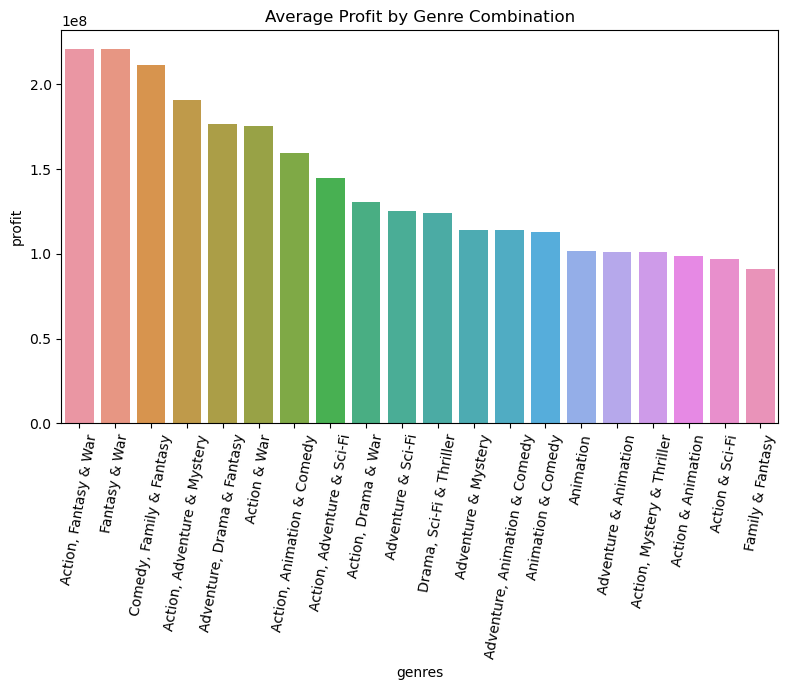

In [192]:
# data for profit per genreTuples (top 20 highest profitting genreTuples)
grouped_tuples_df = profit_genreTuples_df.groupby('genres').mean().sort_values(by='profit', ascending=False).head(20)

fig, ax = plt.subplots(figsize=(8,7))

xlabels = []
for g in grouped_tuples_df.index:
    if type(g) == tuple:
        if len(g) == 3:
            xlabels.append('{}, {} & {}'.format(g[0],g[1],g[2]))
        if len(g) == 2:
            xlabels.append('{} & {}'.format(g[0],g[1]))
    else:
        xlabels.append(g)

sns.barplot(x=grouped_tuples_df.index,
            y='profit',
            data=grouped_tuples_df,
            errwidth=0,
            ax=ax).set(title='Average Profit by Genre Combination', xticklabels=xlabels)
plt.xticks(rotation=80)
fig.tight_layout()
plt.show()

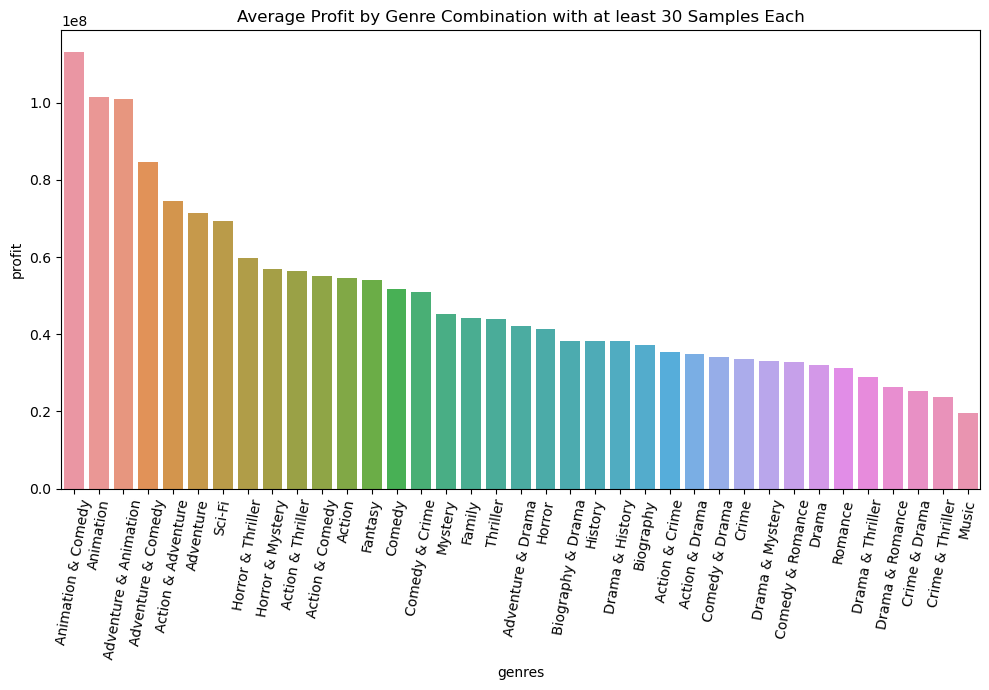

In [193]:
# DATA FOR PROFIT PER GENRETUPLES WITH AT LEAST 30 SAMPLES EACH
num_samples_per_genre_tuple = 30

# reset grouped_tuples so its not just the top 20
grouped_tuples_df = profit_genreTuples_df.groupby('genres').mean().sort_values(by='profit', ascending=False)

# grouped_tuple_count_df has 129 unique genre-combo movies and single-genre movies (29 with over 30 samples)
grouped_tuple_count_df = profit_genreTuples_df.groupby('genres').count()
grouped_tuple_count_df = grouped_tuple_count_df.loc[grouped_tuple_count_df['profit'] > num_samples_per_genre_tuple]
tuple_profit_30samples_df = grouped_tuples_df.join(grouped_tuple_count_df, how='inner', rsuffix='_count').sort_values(by='profit', ascending=False)

fig, ax = plt.subplots(figsize=(10,7))

xlabels = []
for g in tuple_profit_30samples_df.index:
    if type(g) == tuple:
        if len(g) == 3:
            xlabels.append('{}, {} & {}'.format(g[0],g[1],g[2]))
        if len(g) == 2:
            xlabels.append('{} & {}'.format(g[0],g[1]))
    else:
        xlabels.append(g)

sns.barplot(x=tuple_profit_30samples_df.index,
            y='profit',
            data=tuple_profit_30samples_df,
            errwidth=0,
            ax=ax).set(title='Average Profit by Genre Combination with at least 30 Samples Each', xticklabels=xlabels)
plt.xticks(rotation=80)
fig.tight_layout()
plt.show()

# TESTS

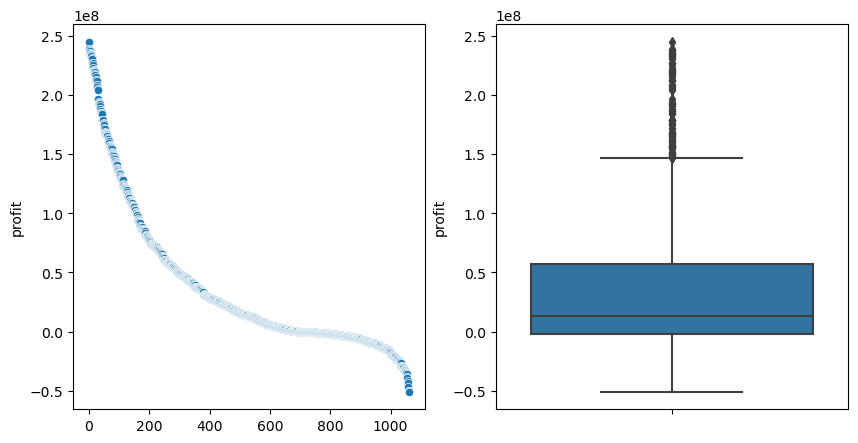

In [194]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))
sns.scatterplot(x=range(len(modern_budgets_df)),y=modern_budgets_df['profit'].sort_values(ascending=False), ax=ax1)
sns.boxplot(y=modern_budgets_df['profit'].sort_values(ascending=False), ax=ax2)
plt.show()